In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [402]:
data = pd.read_csv("/content/data (1).csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [403]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [404]:
dcolumns = ['bedrooms','bathrooms','floors']
for i in dcolumns:
  data[i]=data[i].astype(int)

In [405]:
for i in data.columns:
  print(i ,'=', data[i].dtype)

date = object
price = float64
bedrooms = int64
bathrooms = int64
sqft_living = int64
sqft_lot = int64
floors = int64
waterfront = int64
view = int64
condition = int64
sqft_above = int64
sqft_basement = int64
yr_built = int64
yr_renovated = int64
street = object
city = object
statezip = object
country = object


In [406]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

<BarContainer object of 4600 artists>

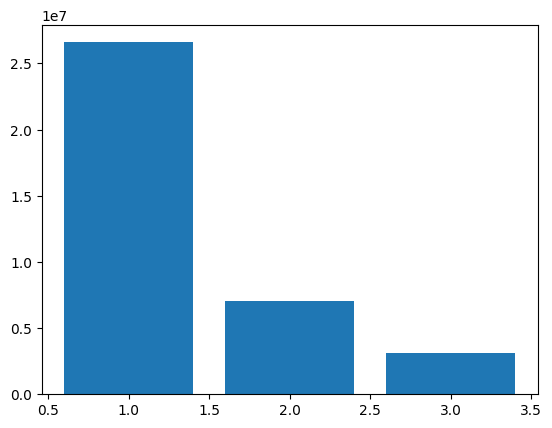

In [407]:
plt.bar(data['floors'],data['price'])

In [408]:
data['city'].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [409]:
data['waterfront'].value_counts()

0    4567
1      33
Name: waterfront, dtype: int64

In [410]:
data.drop(['date','street','statezip','country'],axis=1,inplace=True)

In [411]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent
3,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,Redmond


In [412]:
Numerical_col = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement']
Categorical_col = ['bedrooms','bathrooms','floors','waterfront','view','condition','yr_built','yr_renovated','city']

In [413]:
def FixOutlier(data,col,threshold={},method='imputer'):
  if method=='imputer':
    imputer=KNNImputer()
    data.loc[:,Numerical_col]=imputer.fit_transform(data.loc[:,Numerical_col])

  else:
    data.loc[:,col]=np.clip(data[col].values,threshold['low'],threshold['high'])

  return data.loc[:,col]

In [414]:
def detect_outlier(data,col_name,method = 'imputer'):
  col_values = data.loc[:,col_name]

  q3 = col_values.quantile(0.75)
  q1 = col_values.quantile(0.25)

  upper_limit = q3 + 1.5*(q3 - q1)
  lower_limit = q1 - 1.5*(q3 - q1)

  outliers_upperlimit = col_values.values > upper_limit
  outliers_lowerlimit = col_values.values < lower_limit

  total_outliers = np.logical_or(outliers_upperlimit,outliers_lowerlimit)

  index = np.where(total_outliers)[0]
  print(f"total outliers in {col_name}: {len(index)}")

  plt.scatter(x=[i for i in range(data.shape[0])],y=data[col_name]) # or y = col_values
  plt.plot([upper_limit]*data.shape[0])
  plt.plot([lower_limit]*data.shape[0])
  plt.show()

  print("______Fixing Outliers_____")
  if method == 'imputer':

    data.loc[index,col_name] = np.nan
    data.loc[:,col_name]=FixOutlier(data,col_name)
  plt.scatter(x=[i for i in range(data.shape[0])],y=data[col_name]) # or y = col_values
  plt.plot([upper_limit]*data.shape[0])
  plt.plot([lower_limit]*data.shape[0])
  plt.show()



total outliers in price: 240


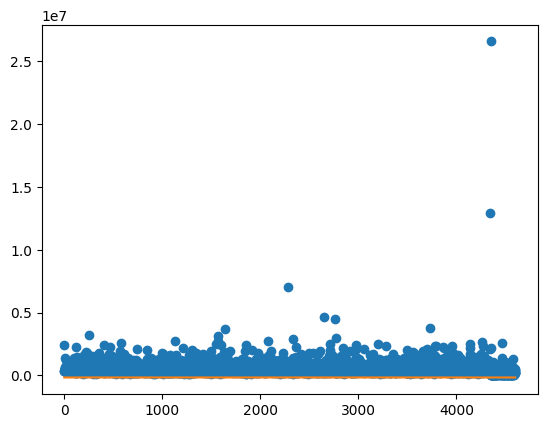

______Fixing Outliers_____


<ipython-input-413-98893beaf057>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,Numerical_col]=imputer.fit_transform(data.loc[:,Numerical_col])


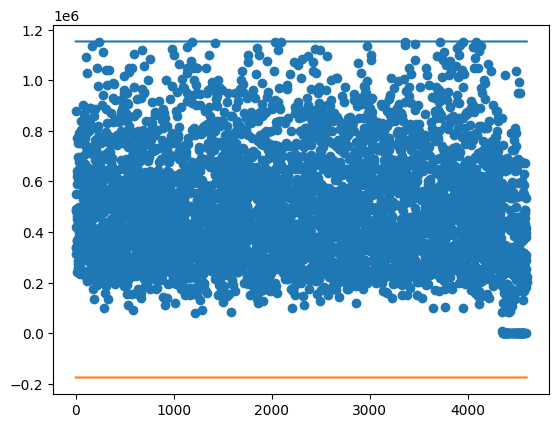

total outliers in sqft_living: 129


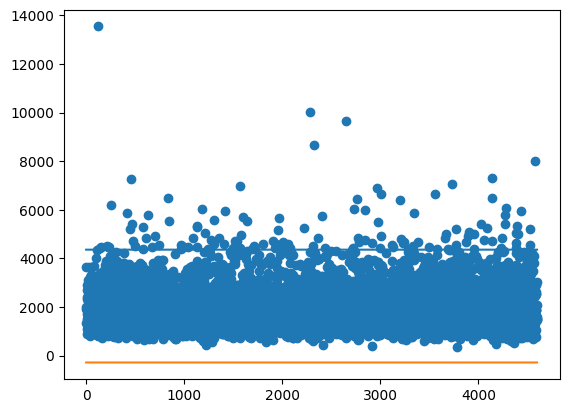

______Fixing Outliers_____


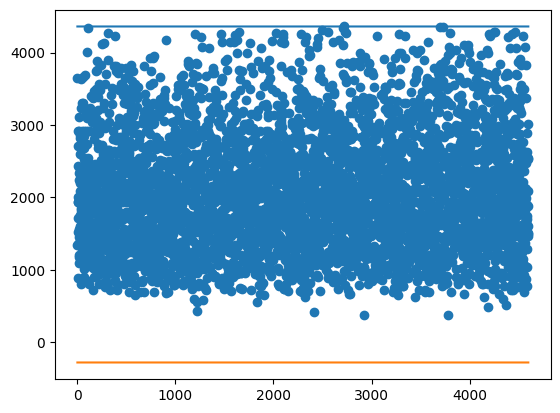

total outliers in sqft_lot: 541


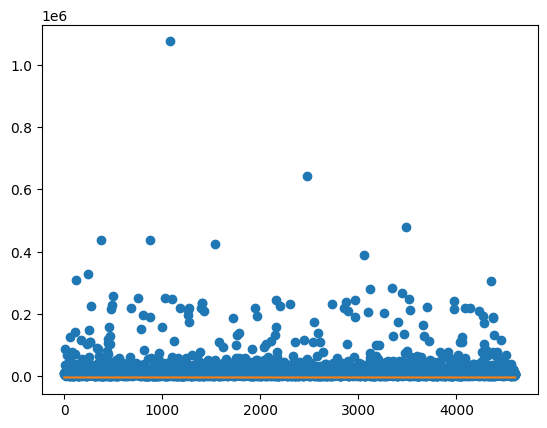

______Fixing Outliers_____


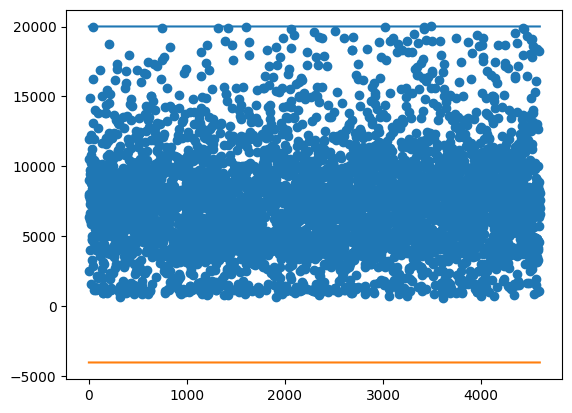

total outliers in sqft_above: 116


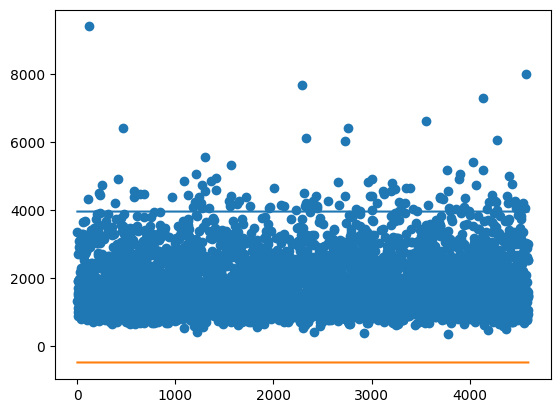

______Fixing Outliers_____


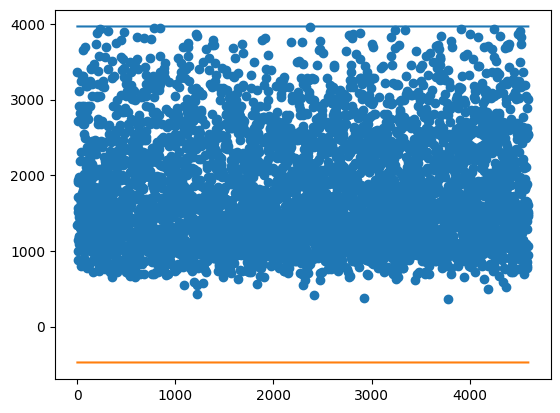

total outliers in sqft_basement: 82


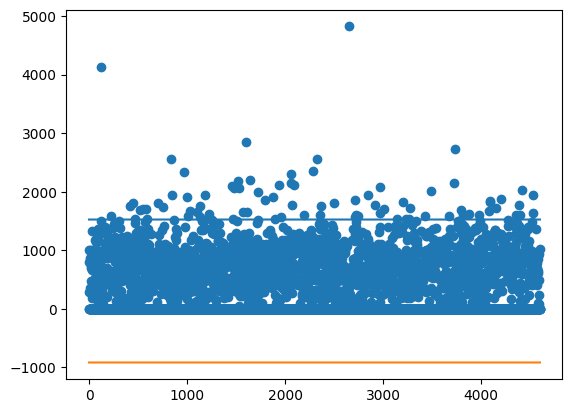

______Fixing Outliers_____


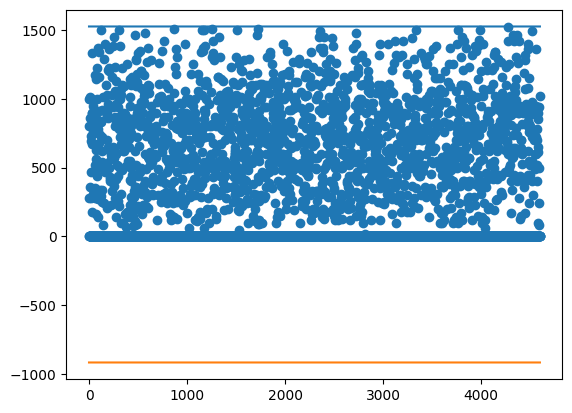

In [415]:
for i in Numerical_col:
  detect_outlier(data,i)

In [416]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3,1,1340.0,7912.0,1,0,0,3,1340.0,0.0,1955,2005,Shoreline
1,877000.0,5,2,3650.0,9050.0,2,0,4,5,3370.0,280.0,1921,0,Seattle
2,342000.0,3,2,1930.0,11947.0,1,0,0,4,1930.0,0.0,1966,0,Kent
3,420000.0,3,2,2000.0,8030.0,1,0,0,4,1000.0,1000.0,1963,0,Bellevue
4,550000.0,4,2,1940.0,10500.0,1,0,0,4,1140.0,800.0,1976,1992,Redmond


In [417]:
Le=LabelEncoder()
data['city']= Le.fit_transform(data['city'])

In [418]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3,1,1340.0,7912.0,1,0,0,3,1340.0,0.0,1955,2005,36
1,877000.0,5,2,3650.0,9050.0,2,0,4,5,3370.0,280.0,1921,0,35
2,342000.0,3,2,1930.0,11947.0,1,0,0,4,1930.0,0.0,1966,0,18
3,420000.0,3,2,2000.0,8030.0,1,0,0,4,1000.0,1000.0,1963,0,3
4,550000.0,4,2,1940.0,10500.0,1,0,0,4,1140.0,800.0,1976,1992,31


In [419]:
data.drop(['city'],axis = 1,inplace = True)

In [420]:
y = data['price']
x = data.drop(['price'],axis = 1)

In [421]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 4)

print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (3220, 12)
x_test shape :  (1380, 12)
y_train shape :  (3220,)
y_test shape :  (1380,)


In [422]:
scaling = StandardScaler()
x_train = scaling.fit_transform(x_train)
x_test = scaling.transform(x_test)


In [423]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)
print("training accuracy: ", model1.score(x_train,y_train))
print("testing accuracy: ", model1.score(x_test,y_test))

training accuracy:  0.42975613098799326
testing accuracy:  0.43258740715228206


In [424]:
from sklearn.ensemble import GradientBoostingRegressor

model3 = GradientBoostingRegressor()
model3.fit(x_train,y_train)
print("training accuracy: ", model3.score(x_train,y_train))
print("testing accuracy: ", model3.score(x_test,y_test))

training accuracy:  0.5758438177556313
testing accuracy:  0.4632214808579822


In [425]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()
model2.fit(x_train,y_train)
print("training accuracy: ", model2.score(x_train,y_train))
print("testing accuracy: ", model2.score(x_test,y_test))

training accuracy:  0.9227648298578214
testing accuracy:  0.42335511964842243
